# Ensemble Modeling Heart Disease 분류 모델 비교 (정상 : 0, 심장 질환 진단 : 1) 모델 비교


*   선형모델(LogisticRegression)과 결정트리(DecisionTreeClassifier), 앙상블 모델의 비교
*   앙상블 모델 (RandomForestClassifier, GradientBoostingClassifier)


In [1]:
!pip install koreanize-matplotlib

## 패키지 import

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import koreanize_matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## 데이터 준비하기


*   https://archive.ics.uci.edu/dataset/45/heart+disease
*   전처리 데이터로 데이터 준비






In [3]:
X = pd.read_csv('/content/heart_features_20230801.csv')

X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,1.088233,1.270395,-0.098127,-0.169712,1.748923,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.303853,0.177516,-0.804308,0.926238,0.711873,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
2,0.327115,-0.551070,-0.025073,1.225134,0.020507,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.435846,0.906102,-1.096521,-0.269344,-0.440404,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0.327115,0.906102,1.387290,-0.020264,0.596645,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [4]:
y = pd.read_csv('/content/heart_target_20230801.csv')
y.head()

,output
0,1
1,1
2,1
3,1
4,1


In [5]:
print(X.shape)
print(y.shape)

(236, 30)
(236, 1)


## 훈련셋, 테스트셋 분리

In [6]:
# 80 :  20 비율로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print('X_train.shape', X_train.shape)
print('X_test.shape', X_test.shape)

X_train.shape (188, 30)
X_test.shape (48, 30)


## 머신러닝 모델 설정 및 학습

In [14]:
# 딕셔너리 생성 -> 각각의 결과를 저장하기 위해
scores = {}
r_scores = {}

### 1. LogisticRegression

In [26]:
log_reg = LogisticRegression().fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

r_scores['LogisticRegression'] = metrics.recall_score(y_test, y_pred)
print('테스트세트 재현율 : {:.5f}%'.format(r_scores['LogisticRegression'] * 100))

scores['LogisticRegression'] = log_reg.score(X_test, y_test)

print('훈련세트 정확도 : {:.5f}%'.format(log_reg.score(X_train, y_train)*100))
print('테스트세트 정확도 : {:.5f}%'.format(log_reg.score(X_test, y_test)*100)) # 소숫점 5째 자리까지, 퍼센티지

recall : 93.75000%
훈련세트 정확도 : 90.42553%
테스트세트 정확도 : 83.33333%


### 2. DecisionTree

In [20]:
tree = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train) # random_state 가 고정되어있지 않기떄문에 수시로 바뀐다.

y_pred = tree.predict(X_test)

r_scores['DecisionTreeClassifier'] = metrics.recall_score(y_test, y_pred)
print('테스트세트 재현율 : {:.5f}%'.format(r_scores['DecisionTreeClassifier'] * 100))

scores['DecisionTreeClassifier'] = tree.score(X_test, y_test)

print('훈련세트 정확도 : {:.5f}%'.format(tree.score(X_train, y_train)*100))
print('테스트세트 정확도 : {:.5f}%'.format(tree.score(X_test, y_test)*100)) # 소숫점 5째 자리까지, 퍼센티지

recall : 84.37500%
훈련세트 정확도 : 96.80851%
테스트세트 정확도 : 81.25000%


### 3. RandomForest

In [21]:
random = RandomForestClassifier(n_estimators=100, random_state=7).fit(X_train, y_train)

y_pred = random.predict(X_test)

r_scores['RandomForestClassifier'] = metrics.recall_score(y_test, y_pred)
print('테스트세트 재현율 : {:.5f}%'.format(r_scores['RandomForestClassifier'] * 100))

scores['RandomForestClassifier'] = random.score(X_test, y_test)

print('훈련세트 정확도 : {:.5f}%'.format(random.score(X_train, y_train)*100))
print('테스트세트 정확도 : {:.5f}%'.format(random.score(X_test, y_test)*100)) # 소숫점 5째 자리까지, 퍼센티지

recall : 93.75000%
훈련세트 정확도 : 100.00000%
테스트세트 정확도 : 85.41667%


### 4. GradientBoosting

In [22]:
boost = GradientBoostingClassifier(max_depth=3, learning_rate=1.4).fit(X_train, y_train)

y_pred = boost.predict(X_test)

r_scores['GradientBoostingClassifier'] = metrics.recall_score(y_test, y_pred)
print('테스트세트 재현율 : {:.5f}%'.format(r_scores['GradientBoostingClassifier'] * 100))

scores['GradientBoostingClassifier'] = boost.score(X_test, y_test)

print('훈련세트 정확도 : {:.5f}%'.format(boost.score(X_train, y_train)*100))
print('테스트세트 정확도 : {:.5f}%'.format(boost.score(X_test, y_test)*100)) # 소숫점 5째 자리까지, 퍼센티지

recall : 87.50000%
훈련세트 정확도 : 100.00000%
테스트세트 정확도 : 87.50000%


## 모델 성능 비교

In [33]:
# test score
score_df = pd.DataFrame()
score_df['method'] = scores.keys()
score_df['score'] = scores.values()
score_df['recall'] = r_scores.values()
score_df

,method,score,recall
0,LogisticRegression,0.833333,0.93750
1,DecisionTreeClassifier,0.812500,0.84375
2,RandomForestClassifier,0.854167,0.93750
3,GradientBoostingClassifier,0.875000,0.87500


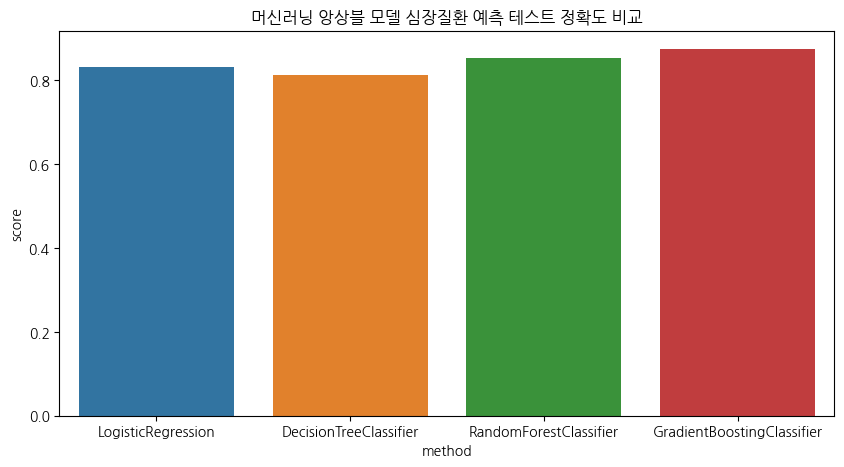

In [24]:
plt.figure(figsize=(10,5))

plt.title('머신러닝 앙상블 모델 심장질환 예측 테스트 정확도 비교')
sns.barplot(score_df, x='method', y='score');

## 성능지표(recall) 머신러닝 모델 비교


*   기존 score_df 데이터프레임에 recall 칼럼 추가
*   4가지 모델의 recall 값을 추가
*   차트로 시각화


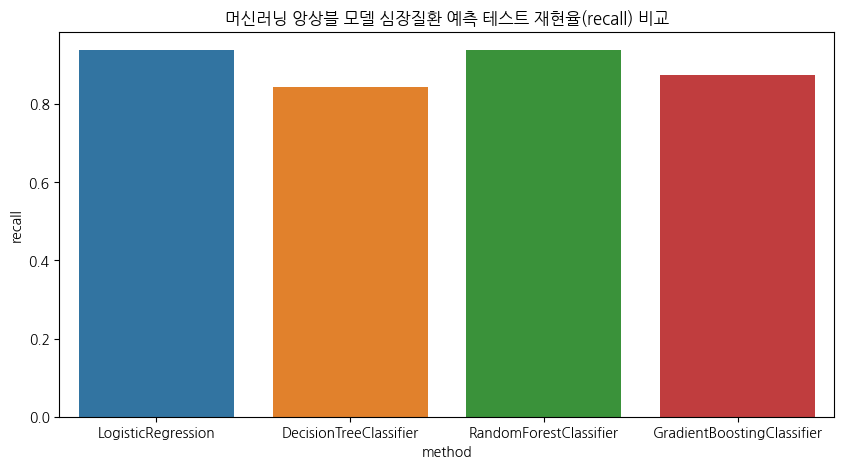

In [32]:
plt.figure(figsize=(10,5))

plt.title('머신러닝 앙상블 모델 심장질환 예측 테스트 재현율(recall) 비교')
sns.barplot(score_df, x='method', y='recall');